# Evaluating classifiers

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
# allow multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Let us first import our data set about wine quality. The dataset is available in UCI repository https://archive.ics.uci.edu/ml/datasets/wine+quality, and you have the downloaded csv.
This dataset is one of the two datasets that are related to red and white variants of the Portuguese "Vinho Verde" wine.
For more details, please consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  
 
First let's import the csv you downloaded with this notebook into a panda dataframe. Make sure the dataset is in the same directory as where you placed the notebook. The default separator for reading cvs files is ',' so we need to specify that in our csv file, the columns are separated with ';'. 

In [2]:

df=pd.read_csv('winequality-white.csv', sep=';')

Let's take a look at the first 5 lines of our dataset.

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Now, let's get some info on our dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Notice that we have 4898 data instances (rows) and 10 float features and a integer feature quality which will be used to construct the target. Let's check the statistics of the numerical columns (in our case, all the features are numerical).

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Let's now check the distribution of the attribute *quality*.

In [6]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

 This is not a binary classification problem – so we will turn it into one. Let’s say the wine is Good (label 1) if the quality is 7 or above, and Bad (label 0) otherwise:

In [7]:
df['target']=0
df.loc[df.quality>=7,'target']=1
# alternatively we could have written df['target']=[1 if quality>=7 else 0 for quality in df['quality']]
df['target'].value_counts()

0    3838
1    1060
Name: target, dtype: int64

We can plot the percentages of the target variable

Text(0.5, 1.0, 'percentage of the classes')

Text(0.5, 0, 'type of wine')

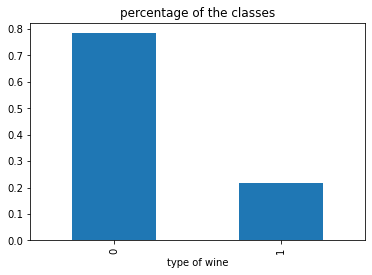

In [8]:
ax=df['target'].value_counts(normalize=True).plot(kind='bar')
ax.set_title('percentage of the classes')
ax.set_xlabel('type of wine')

Notice that we have quite the common case where we do not have the same percentage of classes, bad wines are more common than our good ones: we have an imbalanced dataset. There are different techniques for dealing with such datasets, but we will only discuss them later.

Let's now drop the column we used to construct our target, otherwise the model could just learn the simple mapping from quality to target. And let's check our columns.

In [9]:
df.drop(columns='quality', inplace=True)
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')

Now, let's see do we have missing data.

In [10]:
 df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
target                  0
dtype: int64

We do not have any missing values, so we can proceed with classification. To see the generalization performance of our model, we need to use a holdout set: that is, we hold back some subset of the data from the training of the model, and then use this holdout set to check the model performance. This splitting can be done using the train_test_split utility in Scikit-Learn:

In [11]:
from sklearn.model_selection import train_test_split
X=df.drop(columns='target')
y=df['target']
# split the data with 50% in each set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                  test_size=0.25)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(3673, 11)

(1225, 11)

(3673,)

(1225,)

Let's scale our data. It is not necessary for basic Logistic Regression, but it is recommended in regularized versions. Now, let's do it for practice.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

StandardScaler()

Let's now classify using Logistic Regression. Note that we will use the train dataset to train our model, and we will use the test dataset to evaluate it.

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y) 

LogisticRegression(random_state=42, solver='liblinear')

Recall that sklearn method for models *predict* outputs the predicted class, while *predict_proba* outputs the probability of belonging to a class. The default threshold for deciding the classes in the case of binary classification is 0.5, hence Logistic Regression chooses the class that has the biggest probability: outputs 1 if P(Y=1|x) > 0.5 (then obviously P(Y=0|x) <P(Y=1|x)). 

In [14]:
#generate predicted classes for test data
y_pred= log_reg.predict(X_test)
#generate predicted probabilites for test data
y_pred_prob = log_reg.predict_proba(X_test)


Now let's look at some evaluation metrics.

#### Confusion matrix
The predicted classes are represented in the columns of the matrix, whereas the actual classes are in the rows of the matrix. We then have four cases:
- True positives (TP): the cases for which the classifier predicted 1 and the the class is actually 1.
- True negatives (TN): the cases for which the classifier predicted 0 and the class is actually 0.
- False positives (FP): the cases for which the classifier predicted 1 but class is actually 0.
- False negatives (FN): the cases for which the classifier predicted 0 but the the class is actually 1.

In order to avoid confusion, note the following. ‘True’ or ‘false’ indicate if the classifier predicted the class correctly, whereas ‘positive’ or ‘negative’ indicate if the classifier predicted the desired class (in this case, ‘positive’ correspond to ‘good wine’, as this is the type of wine we want to predict).
The entries of the confusion matrix are the number of occurrences of each class for the dataset being analysed. Let’s obtain the confusion matrix by using the function confusion_matrix:


[[717 224]
 [128 156]]


0    941
1    284
Name: target, dtype: int64

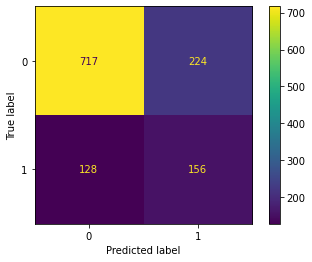

In [15]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

print(confusion_matrix(y_test, y_pred))
y_test.value_counts()
plot_confusion_matrix(log_reg, X_test, y_test)

Let's interpret these values:
Out of the 284 instances of class 1 in our test set, the model identified 157 of them as 1, and 127 predicted as 0 (false negatives, type II error).
Out of 941 wines of class 0, 717 were identified correctly as 0, and 224 were false positives (type I error).

#### Accuracy, precision, recall,F1 score
There are many different metrics we could check.

Accuracy: it answers the question:"How many decisions did we get right?"
<div>
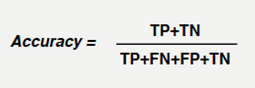
</div>


Precision: it answers the question:
"When it predicts the positive result, how often is it correct?"
<div>
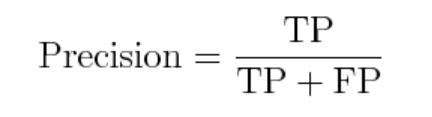
</div>
Recall: it answers the question: "How many instances of positive class did it actually identify?"
<div>
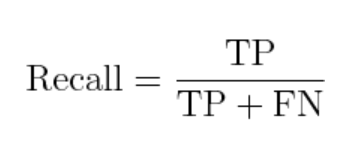
</div>
F1-score: this is just the harmonic mean of precision and recall:
<div>
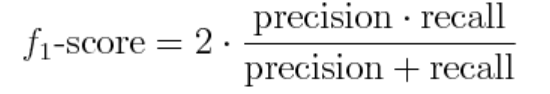
</div>

Sklearn offers a report on all the metrics for all the classes.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

Alternatively, we could check the metrics individually.

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('accuracy is ', accuracy_score(y_test, y_pred))
print('precision is', precision_score(y_test, y_pred))
print('recall is', recall_score(y_test, y_pred))
print('F1 score is', f1_score(y_test, y_pred))

Note that the accuracy seems relatively high compared to other metrics, this is because the dataset in unbalanced, and the model does a much better job for majority class 0, compared to class 1. Accuracy calculates the overall number of correct decisions, while the other metrics refer to class 1.

#### ROC, ROC AUC, Precision Recall Curves, PR AUC
So far, we have only considered the threshold of 0.5, and we did not look at the overall performance of the classifier. 
Let's now check the metrics which show the model performance for all the possible thresholds.
Receiver operating characteristic (ROC) curve is created by plotting the true positive rate (TPR) (or recall) against the false positive rate (FPR).

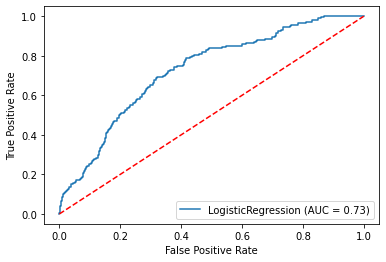

In [16]:
from sklearn.metrics import  plot_roc_curve
import matplotlib.pyplot as plt
plot_roc_curve(log_reg, X_test, y_test) 
plt.plot([0, 1], [0, 1],'r--')

The plot already shows the value of AUC (Area under the curve), but we could also check it directly. Note that now as the argument we use predicted probabilities. The array y_pred_prob has two columns, one for each class. We need to use the probabilities of belonging to class 1, hence we choose the second column: y_pred_prob[:,1]

In [1]:
from sklearn.metrics import roc_auc_score
print('ROC AUC is', roc_auc_score(y_test, y_pred_prob[:,1]) )

NameError: name 'y_test' is not defined

Or the same value could be calculated using the funcion *auc*.

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)
print('ROC AUC is', roc_auc) 

Now, let's look at the precision recall curve.

In [ ]:
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, auc
plot_precision_recall_curve(log_reg, X_test, y_test)


As with the ROC curve, each point in the plot corresponds to a different threshold. Threshold equal to 0 implies that the recall is 1, whereas threshold equal to 1 implies that the recall is 0. Note that the precision starts from roughly 0.2, as there aren't many false positives (since class 1 accounts for roughly 20% of the dataset). With the precision-recall curve, the closer it is to the top-right corner, the better the algorithm. And hence a larger area under the curve (AUC) indicates that the algorithm has higher recall and higher precision. We can again check the area under the curve AUC. 

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob[:,1])
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

PR AUC is also known as the average precision and can be calculated as follows:

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred_prob[:,1])
print(average_precision)

AUC is not connected with any particular threshold (we are averaging over all the possible thresholds), and so it doesn’t tell us which is the best threshold to consider for useful classification predictions. We could also check what value of threshold would give us the highest f1 score.

In [ ]:
f1_scores = 2*recall*precision/(recall+precision)
best_threshold=thresholds[np.argmax(f1_scores)]
print('Best threshold: ', best_threshold)
print('Best F1-Score: ', np.max(f1_scores))

Let's now check the confusion matrix if we used the threhold that maximizes F1.

In [ ]:
y_pred_new = (y_pred_prob[:,1] >= best_threshold).astype(int)
print('previous confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('new confusion matrix')
print(confusion_matrix(y_test, y_pred_new))
print('previous metrics')
print(classification_report(y_test, y_pred))
print('new metrics')
print(classification_report(y_test, y_pred_new))

Notice that for almost the same precision, with this new threshold we have a much better recall (for class 1). 

#### Cumulative response and lift curves
We will use an additional library: please install in your environment:

conda install -c conda-forge scikit-plot

Cumulative response curve is similar to ROC, but more intuitive. 
It plots the hit rate (true positive rate; y axis), i.e., the percentage of positives correctly classified, as a function  of the percentage of the population that is targeted (x axis). 


In [ ]:
from scikitplot.metrics import plot_cumulative_gain
plt.figure(figsize=(7,7))
plot_cumulative_gain(y_test, y_pred_prob)


We see that if we consider the top 20% ranked instances, we would get around 40% of instances of class 1.

The lift curve is essentially the value of the cumulative response curve at a given x point divided by the diagonal line (y=x) value at that point. 

In [ ]:
from scikitplot.metrics import plot_lift_curve
plt.figure(figsize=(7,7))
plot_lift_curve(y_test, y_pred_prob)
plt.show()

We see that if we consider the top 20% ranked instances, we would get almost twice as many instances of class 1, compared to if we took random 20% of instances (Lift around 2). The value of lift is "the value of the cumulative response curve at a given x point divided by the diagonal line (y=x) value at that point". As thhe cumulative response curve at 20% is 40%, diving 40 by 20 gives us our lift of 2.



### Practice question

For the same dataset apply KNN Classifier with some number of neighbors of your choice.
Evaluate the performance of the algorithm, looking at all of the above metrics.




## Cross validation and Hyperparameter tuning

Let's now look at the familiar example of polynomial regression.
Adapted from https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html

First, let's generate some data.

In [17]:
#ravel: A 1-D array, containing the elements of the input, is returned
m=1000
np.random.seed(42)
X = 10* np.random.rand(m, 1) ** 2
y = 10 - 1. / (X.ravel() + 0.1)
y += 0.1 * np.random.randn(m)

Next, let's visualize our data.

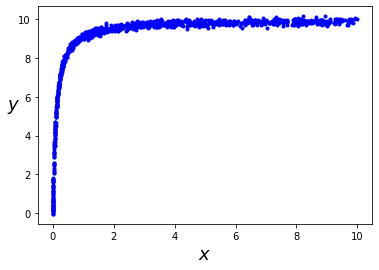

In [19]:
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18);


Now, let's use the same pipeline similar to lecture 2, where we used PolynomialFeatures to transform our training data, adding the polynomials up to a specified degree of each feature in the training set as new features (in this case there is just one feature). Then we used linear regression.
Recall that *Pipeline* allows us to sequentially apply a list of transforms and a final estimator. The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. 
We will use *make_pipeline* which constructs a Pipeline from the given estimators. This is a shorthand for the Pipeline constructor; it does not require, and does not permit, naming the estimators. Instead, their names will be set to the lowercase of their types automatically.




In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree, include_bias=False),
                         LinearRegression(**kwargs))

All scikit-learn estimators have *get_params* and *set_params* functions. The *get_params* function takes no arguments and returns a dictionary of the _init_ parameters of the estimator, together with their values. Let's check the parameters of our pipeline (we will need it later on).

In [ ]:
PolynomialRegression().get_params()

Next, let's fit our new estimator (polynomial features + linear regression) to our training data (X,y) for varying number of degrees. Then, let's generate 500 points in the range(-0.1,10.1) and predict their y value with these estimators of different degrees.

In [ ]:
X_plot_test = np.linspace(-0.1, 10.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='b')
axis = plt.axis()
for degree in [1, 3, 5,10]:
    y_plot_test = PolynomialRegression(degree).fit(X, y).predict(X_plot_test)
    plt.plot(X_plot_test.ravel(), y_plot_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 10.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

The knob controlling model complexity in this case is the degree of the polynomial, which can be any non-negative integer. A useful question to answer is this: what degree of polynomial provides a suitable trade-off between bias (under-fitting) and variance (over-fitting)?


Learning the parameters of a prediction function and testing it on the same data is a mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. 
This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. 
When evaluating different settings (“hyperparameters”) for estimators, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets. The following procedure is followed for each of the k “folds”:
- a model is trained using  of the folds as training data;
- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

Now, let's first split our original X and y into a test and train set. Then, on train set, let's use Cross Validation to evaluate the error of the estimators of different degrees.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                  test_size=0.2)

Next, let's fit our estimators and evaluate their score. The simplest way to use cross-validation is to call the *cross_val_score* helper function on the estimator and the dataset. By default, the score computed at each CV iteration is the score method of the estimator. For linear regression this is $R^2$. The following link gives a list of all the possoble optins that scoring parameter of cross_val can take.
https://scikit-learn.org/stable/modules/model_evaluation.html
The function *cross_val_score* returns an array of scores of the estimator for each run of the cross validation.
For each value of degree we will keep a mean of scores accros 10 runs.

In [ ]:
from sklearn.model_selection import  cross_val_score
degree_range = np.arange(1, 20)

lin_scores = []

for degree in degree_range:
     model=PolynomialRegression(degree) 
     scores = cross_val_score(model, X_train, y_train, cv=10)
     lin_scores.append(scores.mean())

plt.plot(degree_range, lin_scores, color='b')
plt.xlabel("degree of a polynomial", fontsize=18)
plt.ylabel("$R^2$", fontsize=18)       

Let's see which value of a degree gave the highest $R^2$


In [ ]:
degree_range[np.argmax(lin_scores)]

There are simpler way to do the same. Scikit-Learn provides automated tools to do this in the grid search module. Here is an example of using grid search to find the optimal polynomial model.
Recall that we checked the names of the parameters of our pipeline estimator, and that the name corresponding to the degree of the polynomialFeatures was denoted as *'polynomialfeatures__degree'*

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(1,20)}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=10)

Notice that like a normal estimator, this has not yet been applied to any data. Calling the fit() method will fit the model at each grid point, keeping track of the scores along the way:

In [ ]:
grid.fit(X_train, y_train)

Now that this is fit, we can ask for the best parameters as follows:

In [ ]:
grid.best_params_

Finally, if we wish, we can use the best model and show the fit to our data using .best_estimator_ attribute. By default an estimator is retrained using the best found parameters on the whole dataset.

In [ ]:
model = grid.best_estimator_
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_plot_test = model.fit(X_train, y_train).predict(X_plot_test)
plt.plot(X_plot_test.ravel(), y_plot_test,'r');

The grid search provides many more options, including the ability to search over different combinations of parameters, specify a custom scoring function, to parallelize the computation. For example, we could have also checked whether normalizing the features would lead to a better score.
Parameter *normalize* of Linear Regression: if True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. 

In [ ]:
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__normalize': [True, False]}

If we had many different paramenters and many values to evaluate, randomized search would be a better option than grid.
In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

distributions = dict(polynomialfeatures__degree= randint(1,20))
random_search = RandomizedSearchCV(PolynomialRegression(), distributions, n_iter=10,random_state=1,cv=10)
random_search.fit(X_train, y_train)
random_search.best_params_

Note that in this case we only tested 10 values (n_iter=10), instead of the full range, and still got the same result. However, this is not guaranteed to happen. If you change the random_state to 2, you will get a different result.

Finally to get a better assessment of our model, we should use the test data. Let's check the mean squared error. Note that we could have also used, in the above exercise, instead of $R^2$, the score method as *scoring='neg_root_mean_squared_error'* to look for the model which gives the lowest mean square error (note that here the error is denoted as negative error, since scores are usually maximized, hence negative of the error is used as a score).

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model.fit(X_train, y_train).predict(X_test)
mean_squared_error(y_test, y_pred)

Let's check the $R^2$

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

### Practice question
For the first exercise, using CV find the number of neighbors that maximizes the f1 score. Then evalute this model on the independant test set.